# IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# DATA PREPROCESSING

In [2]:
cp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/collegePlace.csv')
cp.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [3]:
print(cp.shape,"values")
print(f"So our dataset has {cp.shape[0]} rows and {cp.shape[1]} columns.")

(2966, 8) values
So our dataset has 2966 rows and 8 columns.


In [4]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [5]:
cp.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [6]:
cp.describe(include='O')                #object type column

,Gender,Stream
count,2966,2966
unique,2,6
top,Male,Computer Science
freq,2475,776


In [7]:
cp.nunique()

Age                  11
Gender                2
Stream                6
Internships           4
CGPA                  5
Hostel                2
HistoryOfBacklogs     2
PlacedOrNot           2
dtype: int64

In [81]:
print(f"Mean CGPA of Students {cp['CGPA'].mean()}")
print(f"Min age is {cp['Age'].min()} and maximum age is {cp['Age'].max()}")
print(f"Average age is {round(cp['Age'].mean())}")

Mean CGPA of Students 7.073836817262306
Min age is 19 and maximum age is 30
Average age is 21


**From the Data**
 - **Numeric Features**: Age, Internships, CGPA, Hostel, HistoryOfBacklogs, PlacedOrNot.
 - **Categorical  Features**: Gender, Stream

# 1.Who have more backlog male or female?

In [9]:
male=cp['Gender'].value_counts()['Male']
female=len(cp)-male
male,female

(2475, 491)

In [10]:
print(f"Percentage of females getting backlog {round((len(cp.loc[(cp['Gender']=='Female') & (cp['HistoryOfBacklogs']>0)]))/female*100,2)}%")
print(f"Percentage of males getting backlog {round((len(cp.loc[(cp['Gender']=='Male') & (cp['HistoryOfBacklogs']>0)]))/male*100,2)}%")

Percentage of females getting backlog 16.9%
Percentage of males getting backlog 19.68%


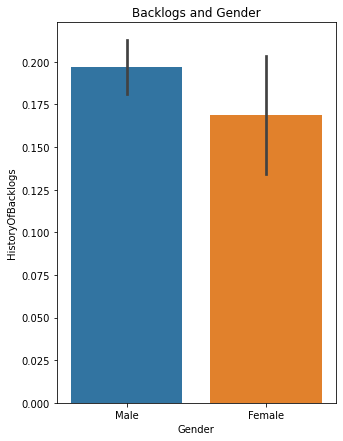

In [13]:
plt.figure(figsize=(5,7))
plt.title('Backlogs and Gender')
sns.barplot(x='Gender',y='HistoryOfBacklogs',data=cp)
plt.show()

# 2.Who have done more internship male or female?

In [14]:
print(f"Percentage of females getting internships {round((len(cp.loc[(cp['Gender']=='Female') & (cp['Internships']>0)]))/female*100,2)}%")
print(f"Percentage of males getting internships {round((len(cp.loc[(cp['Gender']=='Male') & (cp['Internships']>0)]))/male*100,2)}%")

Percentage of females getting internships 67.41%
Percentage of males getting internships 52.69%


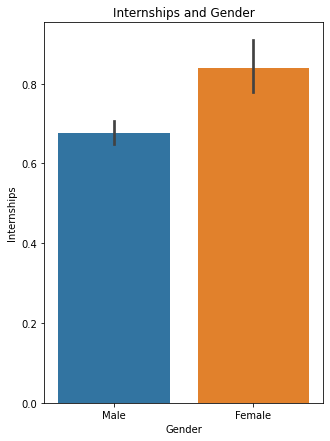

In [15]:
plt.figure(figsize=(5,7))
plt.title('Internships and Gender')
sns.barplot(x='Gender',y='Internships',data=cp)
plt.show()

# 3.Median age of students getting placed?

In [16]:
print(cp.groupby('Stream')['Age'].median(),'\n\n')
print(cp.groupby('Internships')['Age'].median(),'\n\n')
print(cp.groupby('Hostel')['Age'].median(),'\n\n')
print(cp.groupby('HistoryOfBacklogs')['Age'].median(),'\n\n')
print(cp.groupby('PlacedOrNot')['Age'].median(),'\n\n')

Stream
Civil                            21
Computer Science                 21
Electrical                       21
Electronics And Communication    21
Information Technology           21
Mechanical                       21
Name: Age, dtype: int64 


Internships
0    21
1    21
2    21
3    21
Name: Age, dtype: int64 


Hostel
0    21
1    21
Name: Age, dtype: int64 


HistoryOfBacklogs
0    21
1    21
Name: Age, dtype: int64 


PlacedOrNot
0    21
1    21
Name: Age, dtype: int64 




In [17]:
print(f"Median age of students getting Placed is {cp.loc[cp['PlacedOrNot']==1]['Age'].median()}")

Median age of students getting Placed is 21.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


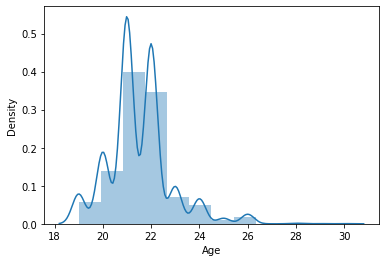

In [21]:
sns.distplot(cp['Age'],bins=12)  #Show a default plot with a kernel density estimate and histogram
plt.show()

# 4.Who have better chance of getting placed hostilities or day scholars?

In [22]:
hosteler=cp['Hostel'].value_counts()[1]
day_scholars=len(cp)-hosteler
day_scholars,hosteler

(2168, 798)

In [24]:
print(f"Percentage of Hostelers getting placed {round((len(cp.loc[(cp['PlacedOrNot']==1) & (cp['Hostel']>0)]))/hosteler*100,2)}%")
print(f"Percentage of day scholars getting placed {round((len(cp.loc[(cp['PlacedOrNot']==1) & (cp['Hostel']==0)]))/day_scholars*100,2)}%")

Percentage of Hostelers getting placed 52.13%
Percentage of day scholars getting placed 56.41%


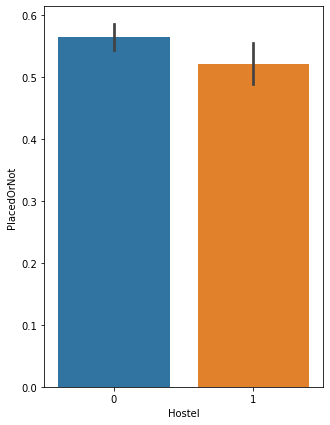

In [41]:
plt.figure(figsize=(5,7))
sns.barplot(x='Hostel',y='PlacedOrNot',data=cp)
plt.show()

# 5.Which branch have higher chance of placement?

In [42]:
print(f"Percentage of CS student getting placed {round((cp.loc[cp['PlacedOrNot']==1]['Stream'].value_counts()['Computer Science'])/cp['Stream'].value_counts()['Computer Science']*100,2)}%")
print(f"Percentage of IT student getting placed {round((cp.loc[cp['PlacedOrNot']==1]['Stream'].value_counts()['Information Technology'])/cp['Stream'].value_counts()['Information Technology']*100,2)}%")
print(f"Percentage of ECE student getting placed {round((cp.loc[cp['PlacedOrNot']==1]['Stream'].value_counts()['Electronics And Communication'])/cp['Stream'].value_counts()['Electronics And Communication']*100,2)}%")
print(f"Percentage of mechanical student getting placed {round((cp.loc[cp['PlacedOrNot']==1]['Stream'].value_counts()['Mechanical'])/cp['Stream'].value_counts()['Mechanical']*100,2)}%")
print(f"Percentage of electrical student getting placed {round((cp.loc[cp['PlacedOrNot']==1]['Stream'].value_counts()['Electrical'])/cp['Stream'].value_counts()['Electrical']*100,2)}%")
print(f"Percentage of civil student getting placed {round((cp.loc[cp['PlacedOrNot']==1]['Stream'].value_counts()['Civil'])/cp['Stream'].value_counts()['Civil']*100,2)}%")

Percentage of CS student getting placed 58.25%
Percentage of IT student getting placed 59.19%
Percentage of ECE student getting placed 59.2%
Percentage of mechanical student getting placed 47.17%
Percentage of electrical student getting placed 54.19%
Percentage of civil student getting placed 46.06%


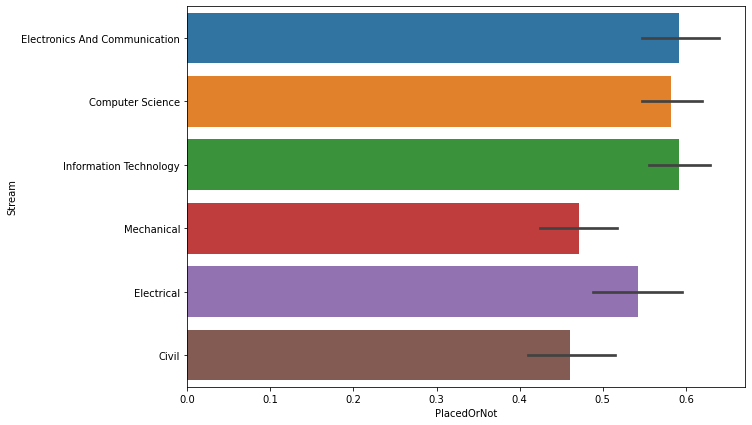

In [44]:
plt.figure(figsize=(10,7))
sns.barplot(y='Stream',x='PlacedOrNot',data=cp)
plt.show()

# 6.Who have more tendency to live in hostels?

In [45]:
print(f"Percentage of females residing in hostels {round((len(cp.loc[(cp['Gender']=='Female') & (cp['Hostel']>0)]))/female*100,2)}%")
print(f"Percentage of males residing in hostels {round((len(cp.loc[(cp['Gender']=='Male') & (cp['Hostel']>0)]))/male*100,2)}%")

Percentage of females residing in hostels 46.84%
Percentage of males residing in hostels 22.95%


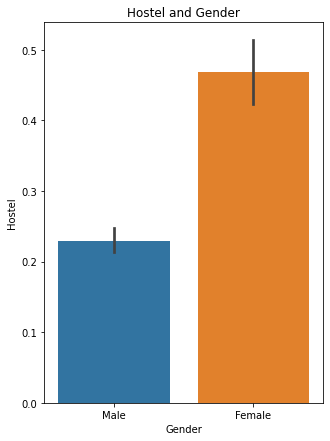

In [46]:
plt.figure(figsize=(5,7))
plt.title('Hostel and Gender')
sns.barplot(x='Gender',y='Hostel',data=cp)
plt.show()

# 7.No. of students getting placed,getting internship,getting backlog,residing in hostels

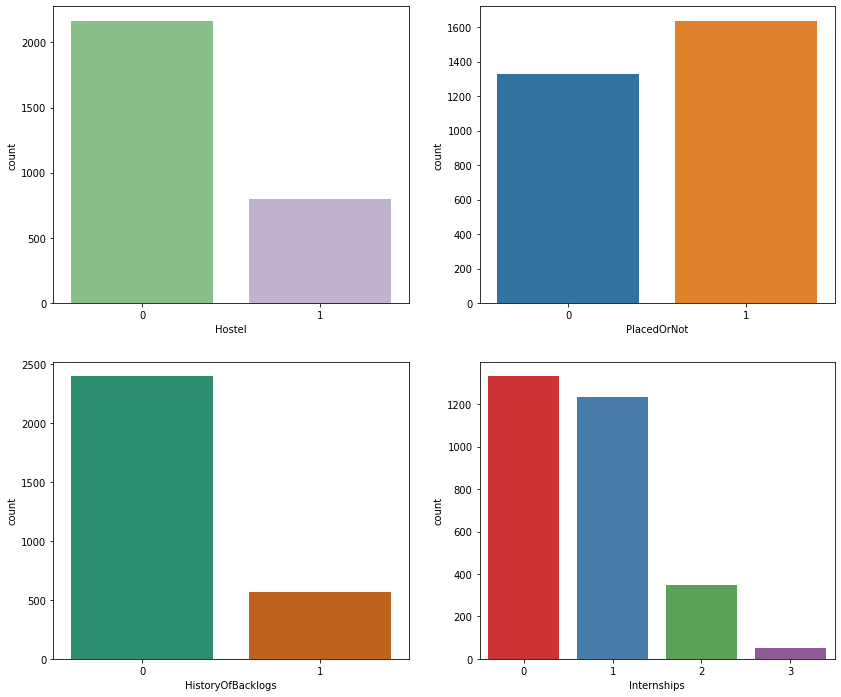

In [47]:
plt.subplots(2,2,figsize=(14,12))

plt.subplot(221)
sns.countplot(data=cp, x='Hostel',palette='Accent')

plt.subplot(222)
sns.countplot(data=cp, x='PlacedOrNot')

plt.subplot(223)
sns.countplot(data=cp, x='HistoryOfBacklogs',palette='Dark2')

plt.subplot(224)
sns.countplot(data=cp, x='Internships',palette='Set1')
plt.show()

In [48]:
print(f"Percentage of students residing in hostel {round(((cp['Hostel'].value_counts()[1])/(len(cp['Hostel']))*100),2)}%")
print(f"Percentage of students Placed {round(((cp['PlacedOrNot'].value_counts()[1])/(len(cp['PlacedOrNot']))*100),2)}%")
print(f"Percentage of students with backlog history {round(((cp['HistoryOfBacklogs'].value_counts()[1])/(len(cp['HistoryOfBacklogs']))*100),2)}%")
print(f"Percentage of Students of who haven't done any internship {round(((cp['Internships'].value_counts()[0])/(len(cp['Internships']))*100),2)}")

Percentage of students residing in hostel 26.9%
Percentage of students Placed 55.26%
Percentage of students with backlog history 19.22%
Percentage of Students of who haven't done any internship 44.88


# 8.No. of students in each stream


In [49]:
cp['Stream'].value_counts()

Computer Science                 776
Information Technology           691
Mechanical                       424
Electronics And Communication    424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64

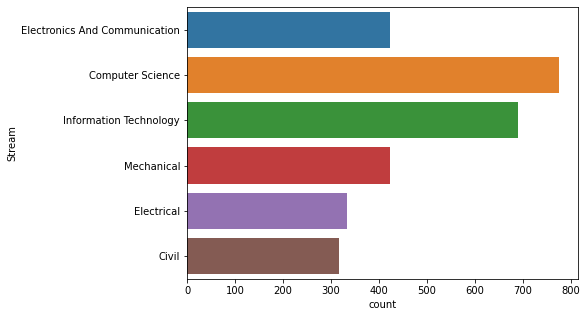

In [52]:
plt.figure(figsize=(7,5))
sns.countplot(data=cp, y='Stream')
plt.show()

# 9. Correlation between features

In [54]:
cp.corr()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.006552,-0.119787,0.003042,-0.042586,0.046943
Internships,0.006552,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,0.179334,0.588648,-0.038182,-0.022337,1.000000


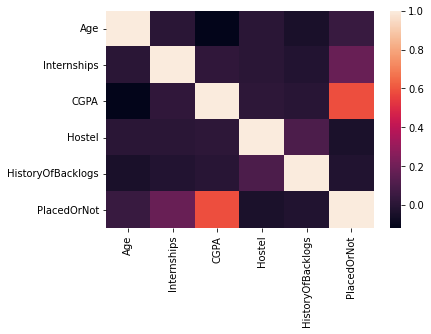

In [53]:
sns.heatmap(cp.corr())
plt.show()

# 10.Male female ratio in dataset

In [56]:
cp['Gender'].value_counts()

Male      2475
Female     491
Name: Gender, dtype: int64

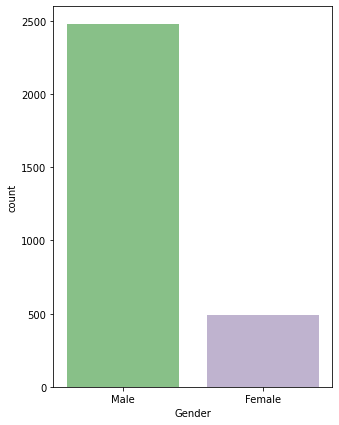

In [55]:
plt.figure(figsize=(5,7))
sns.countplot(data=cp, x='Gender',palette='Accent')
plt.show()

In [57]:
print(f"Percentage of Male in Students {round(cp['Gender'].value_counts()['Male']/len(cp['Gender'])*100,2)}%")

Percentage of Male in Students 83.45%


#Major Objectives#

# 1.feautres with respect to Internship.

In [58]:
print(f"Percentage of candidates getting placed and previously done internships {round(len(cp.loc[(cp['PlacedOrNot']==1) & (cp['Internships']>0)])/cp['PlacedOrNot'].value_counts()[1]*100,2)}%")
print(f"Percentage of candidates getting placed and haven't done internships {round(len(cp.loc[(cp['PlacedOrNot']==1) & (cp['Internships']==0)])/cp['PlacedOrNot'].value_counts()[1]*100,2)}%")

Percentage of candidates getting placed and previously done internships 60.1%
Percentage of candidates getting placed and haven't done internships 39.9%


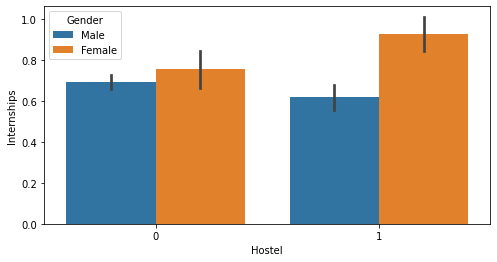

In [59]:
plt.figure(figsize=(8,4))
sns.barplot(x='Hostel',y='Internships',data=cp,hue='Gender')
plt.show()

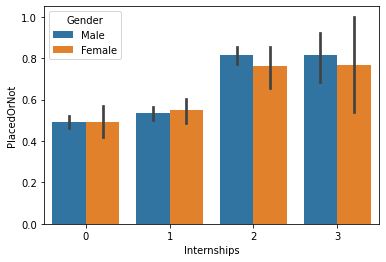

In [60]:
sns.barplot(data=cp,x='Internships',y='PlacedOrNot',hue='Gender')
plt.show()

# 2.feautres with respect to stream

In [61]:
cp.loc[cp['PlacedOrNot']==1]['Stream'].value_counts()          #NO. of student getting placed according to stream

Computer Science                 452
Information Technology           409
Electronics And Communication    251
Mechanical                       200
Electrical                       181
Civil                            146
Name: Stream, dtype: int64

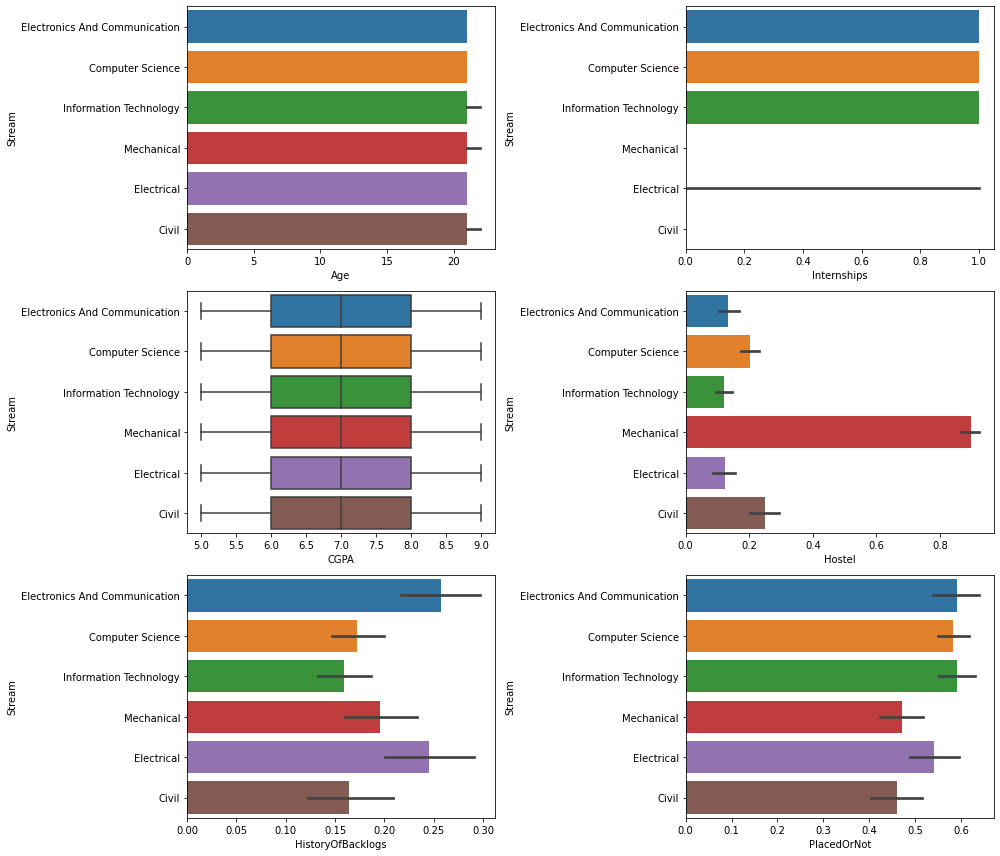

In [63]:
plt.subplots(3,2,figsize=(14,12))

plt.subplot(321)
sns.barplot(y='Stream',x='Age',data=cp,estimator=np.median)

plt.subplot(322)
sns.barplot(y='Stream',x='Internships',data=cp,estimator=np.median)

plt.subplot(323)
sns.boxplot(y='Stream',x='CGPA',data=cp)

plt.subplot(324)
sns.barplot(y='Stream',x='Hostel',data=cp)

plt.subplot(325)
sns.barplot(y='Stream',x='HistoryOfBacklogs',data=cp)

plt.subplot(326)
sns.barplot(y='Stream',x='PlacedOrNot',data=cp)

plt.tight_layout()                               # to adjust the padding between the subplots
plt.show()

# 3.Feautres with respect to backlog

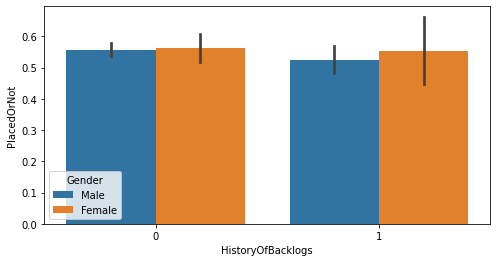

In [66]:
# backlog with respect to gender
plt.figure(figsize=(8,4))
sns.barplot(x='HistoryOfBacklogs',y='PlacedOrNot',data=cp,hue='Gender',estimator=np.mean)
plt.show()

In [67]:
# getting placed with backlog or not
df=cp.groupby('HistoryOfBacklogs')['PlacedOrNot'].mean()
df

HistoryOfBacklogs
0    0.558013
1    0.529825
Name: PlacedOrNot, dtype: float64

# 4.Feautres with respect to gender


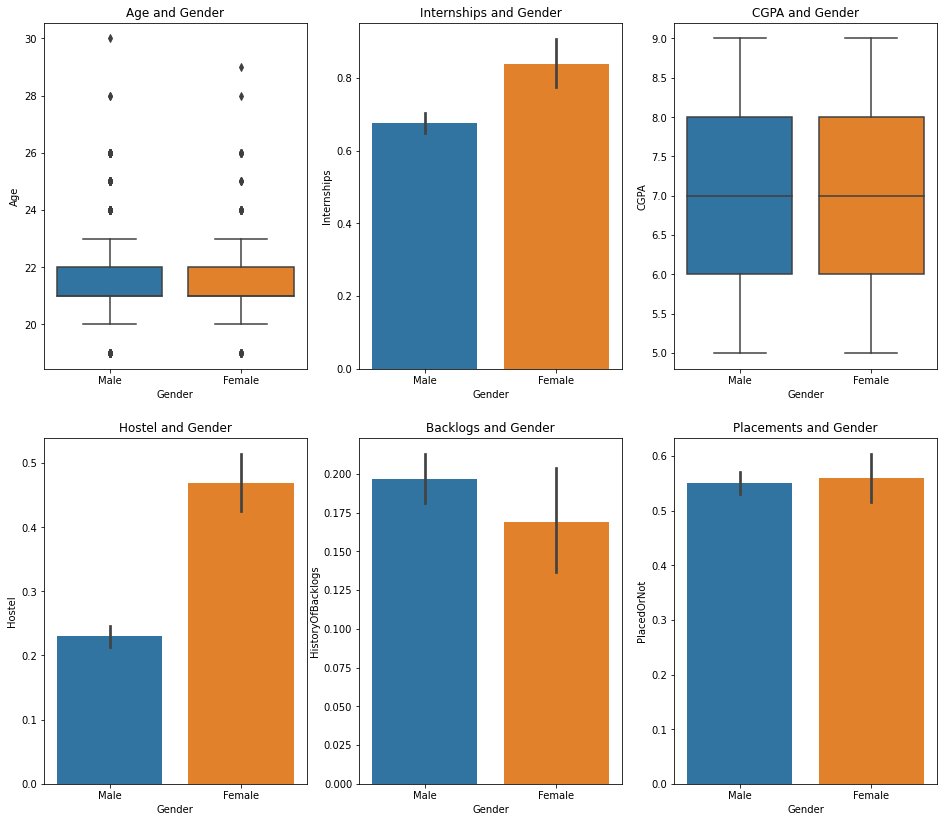

In [68]:
plt.subplots(2,3,figsize=(16,14))

plt.subplot(231)
plt.title('Age and Gender')
sns.boxplot(y='Age',x='Gender',data=cp)                                               
'''Draw a box plot to show distributions with respect to categories.
A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.
The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, 
except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.'''

plt.subplot(232)
plt.title('Internships and Gender')
sns.barplot(x='Gender',y='Internships',data=cp)

plt.subplot(233)
plt.title('CGPA and Gender')
sns.boxplot(x='Gender',y='CGPA',data=cp)

plt.subplot(234)
plt.title('Hostel and Gender')
sns.barplot(x='Gender',y='Hostel',data=cp)

plt.subplot(235)
plt.title('Backlogs and Gender')
sns.barplot(x='Gender',y='HistoryOfBacklogs',data=cp)

plt.subplot(236)
plt.title('Placements and Gender')
sns.barplot(x='Gender',y='PlacedOrNot',data=cp)

plt.show()

# CONCLUSIONS

1.	**Who have more backlog male or female**
* Percentage of females getting backlog 16.9%
* Percentage of males getting backlog 19.68%
* conclusion:Male candidates have more backlog than females
2.	**Who have done more internship male or female**
* Percentage of females getting internships 67.41%
* Percentage of males getting internships 52.69%
* conclusion:Females have more tendency of getting internships
3.	**Median age of students getting placed**
* Meadian age of candidates getting placed 21.0
4.	**Who have better chance of getting placed hostilities or day scholars**
* Percentage of Hostlers getting placed 52.13%
* Percentage of dayscholars getting placed 56.41%
* conclusion:Day Scholars have slightly higher chance of getting placed
5.	**Which branch have higher chance of placement**
* Percentage of CS student getting placed 58.25%
* Percentage of IT student getting placed 59.19%
* Percentage of ECE student getting placed 59.2%
* Percentage of mechanical student getting placed 47.17%
* Percentage of electrical student getting placed 54.19%
* Percentage of civil student getting placed 46.06%
* conclusion:Students from EC branch have the max chances of getting placed followed by IT by a narrow margin and then CS and then Electrical.
6.	**Who have more tendency to live in hostels**
* Percentage of females residing in hostels 46.84%
* Percentage of males residing in hostels 22.95%
* conclusion:Females have more tendency to stay in hostel than males
7.	**count variation with feautres**
* Nearly 50% of students haven't done any internship while among the rest majority of them have done atleast 1 internship and some have even done 3.
* About 25% of the total students were residing in hostel.
* Percentage of students residing in hostel 26.9%
* Percentage of students Placed 55.26%
* Percentage of students with backlog history 19.22%
* Percentage of Students of who haven't done any internship 44.88
8. **No. of students in each stream**
* Computer Science                 776
* Information Technology           691
* Mechanical                       424
* Electronics And Communication    424
* Electrical                       334
* Civil                            317
* No. of students in IT branches are more than core branches
9. ** Correaltion between feautres**
* We can notice moderate amount of correlation between CGPA and Placements We can also see correaltion between Internships and placedOrNot
10. **Male Feamle ratio in Dataset**
* Male      2475
* Female     491
* No. of male is 5 times higher than that of females

# Major objectives conclusion

1. **Feautres with respect to internship**
* Percentage of candidates getting placed and previously done internships 60.1%
* Percentage of candidates getting placed and haven't done internships 39.9%
* If you have done more than 1 internship the chances of getting placed are actually good.
* The chance of getting placed increases as number of Internships increases
* Females do have a slight edge over Male in securing an internship irrespective of the CGPA
* Regarding Internships, students from CS, IT & EC tend to have one internship than that of Mechanical, Electrical & Civil who have an average of 0.
2. **Feauters with respect to stream**
* No. of students getting placed from respective branches:
* Computer Science                 452
* Information Technology           409
* Electronics And Communication    251
* Mechanical                       200
* Electrical                       181
* Civil                            146
* The median score of Studets irrespective of their branches is 7CGPA.
* On an average the students of Mechanical have much higher tendency to settle in Hostel than that of the students from other branches.
* Students from EC & Electrical branch have higher chances of getting a Backlog, followed by Mechanical while the IT and Civil being the least chances to get Backlogs.
* Students from EC branch have the max chances of getting placed followed by IT by a narrow margin and then CS and then Electrical.
3. **Feautres with respect to backlog**
* HistoryOfBacklogs
* 0    0.558013
* 1    0.529825
* There chances of getting placed with backlogs and without backlogs are approximately same
4. **Feautres with respect to gender**
* The median vaue of Internships by Female is quite higher than that of the Male one's.
* Male as well as the Female candidates have same median value of 7CGPA.
* Female have more tendency to stay in hostel than the Males.
* On an average Male candidate has more backlogs then the Female ones.
* With respect to Placements, the chances of Female candidate being placed is just a fraction more than that of the Male candidates.

# ML MODEL

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix

In [70]:
x=cp.drop(['PlacedOrNot'],axis=1)
y=cp['PlacedOrNot']

In [71]:
le=LabelEncoder()
x['Gender']=le.fit_transform(x['Gender'])
x['Stream']=le.fit_transform(x['Stream'])

In [72]:
x.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,3,1,8,1,1
1,21,0,1,0,7,1,1
2,22,0,4,1,6,0,0
3,21,1,4,0,8,0,1
4,22,1,5,0,8,1,0


In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [74]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [75]:
pred=clf.predict(x_test)

In [76]:
accuracy_score(y_test,pred)

0.8821548821548821

In [77]:
mean_squared_error(y_test,pred)

0.11784511784511785

In [78]:
confusion_matrix(y_test,pred)

array([[262,  18],
       [ 52, 262]])

# Saving the model

In [79]:
import pickle
pickle.dump(clf,open('/content/drive/MyDrive/Colab Notebooks/college_placements.sav','wb'))

In [80]:
model=pickle.load(open('/content/drive/MyDrive/Colab Notebooks/college_placements.sav','rb'))
model.predict([[20,0,0,0,6,1,1]])

array([0])

In [ ]:
{'Computer Science':1,'Information Technology':4,'Mechanical':5,'Electronics And Communication':3,'Electrical':2,'Civil':0}
{'Male':1,'Female':0}
#DecisonTree=0.8804713804713805
#RandomForest=0.8787878787878788
#LogisticRegression=0.7222222222222222
#Gaussian Naive bayes=0.7861952861952862
#KNN =0.8737373737373737